In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

C:\Users\renuka\Anaconda3\envs\pythondata\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\renuka\Anaconda3\envs\pythondata\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


In [2]:
data_df =pd.DataFrame(data)
data_df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
#  Minimum price of the data
minimum_price = data_df["MEDV"].min()

#  Maximum price of the data
maximum_price = data_df['MEDV'].max()

#  Mean price of the data
mean_price = data_df['MEDV'].mean()

#  Median price of the data
median_price = data_df['MEDV'].median()

#  Standard deviation of prices of the data
std_price = data_df['MEDV'].std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165340.27765266784


In [4]:
#  Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    #  Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [6]:
#  Import 'train_test_split'
from sklearn.cross_validation import train_test_split
import random
random.seed(42)
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split (features, prices, test_size=0.2, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


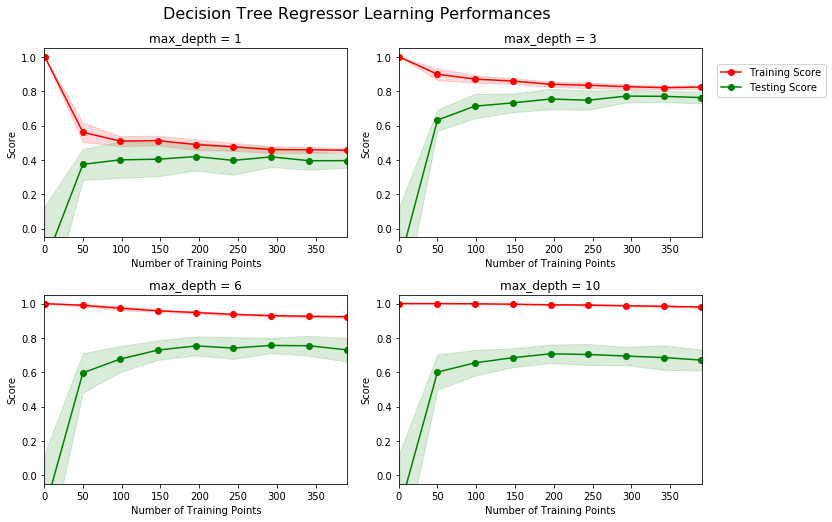

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

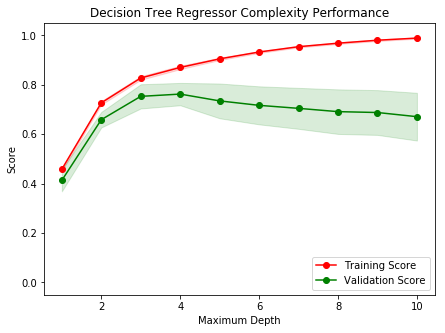

In [8]:
vs.ModelComplexity(X_train, y_train)

In [9]:
#  Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
def fit_model(X, y):
    # Create cross-validation sets from the training data
    
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.1, random_state = 0)
   
    #  Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    #  Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth": np.arange(1, 10)}
    #parameters = {"max_depth":[2,4,6,8,10],"min_samples_leaf":[2,4,6,8,10],"min_samples_split":[2,4,6,8,10]}

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    #  Create the grid search cv object --> GridSearchCV()
    
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
   
    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [11]:
# import test_data.csv for testing model
test_data = pd.read_csv('test.csv')

In [ ]:
room_size = test_data['RM']
#room_size

In [12]:
price_data_list =[]
# Produce a matrix for client data
#client_data = [[5, 17, 15], # Client 1
          #     [4, 32, 22], # Client 2
          #     [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(test_data)):
    #print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    price_data = price
    price_data_list.append(price_data)
    #print(price_data)

In [ ]:
#rm_test =test_data['RM']
#rm_test

In [13]:
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show>

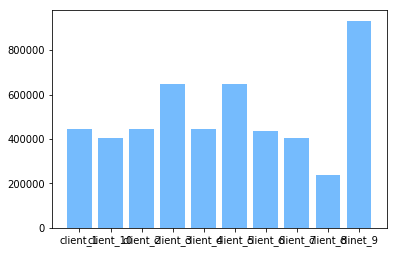

In [14]:
#x = np.random.randn(10)
x =['client_1','client_2','client_3','client_4','client_5','client_6','client_7','client_8','clinet_9','client_10']
plt.bar(x,price_data_list,color = 'xkcd:sky blue')
plt.show

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

In [ ]:
y =price_data
print(y)

In [ ]:
x =['client_1','client_2','client_3','client_4','client_5','client_6','client_7','client_8','clinet_9','client_10']
#x=test_data
rm = test_data['RM']
lstat = test_data['LSTAT']
y = price_data_list
data = [go.Bar(x=x,
               y=y,
               text=[test_data['RM']]
              )]
py.iplot(data)